In [138]:
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo
from scipy.stats import bartlett
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pingouin as pg
import seaborn as sns

In [139]:
data_path = "data_cleaned_feature_31.csv"
data = pd.read_csv(data_path)
print(data.columns)
data.shape

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds'],
      dtype='object')


(149885, 31)

In [140]:
# drop duplicates
data = data.drop(['video_trending_country'],axis=1).drop_duplicates()
data.shape

(114683, 30)

In [141]:
data.select_dtypes(include=['int64', 'float64'])

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count,engagement_rate,video_duration_seconds
0,156272.0,4615.0,238.0,46473647,321000,207,0.031055,774.0
1,2148646.0,222346.0,11225.0,6395292,158000,61,0.108706,317.0
2,1106491.0,44317.0,2406.0,2807917957,8880000,1612,0.042226,2223.0
3,1185486.0,25373.0,2664.0,122939495,389000,635,0.023650,1297.0
4,69035.0,4346.0,125.0,85074466,436000,1429,0.064764,1269.0
...,...,...,...,...,...,...,...,...
149880,8548359.0,378107.0,3089.0,5592638348,12500000,1019,0.044593,24.0
149881,22553412.0,623924.0,7208.0,6331232520,8890000,480,0.027984,15.0
149882,63090147.0,2451904.0,3598.0,33506017412,44400000,3136,0.038921,15.0
149883,765386.0,27876.0,716.0,42201127,379000,809,0.037356,6566.0


In [142]:
duplicate_summary = {
    "Total Rows": len(data),
    "Duplicate Rows (Entire Row)": data.duplicated().sum(),
    "Duplicate Video IDs": data.duplicated(subset=['video_id']).sum()
}
duplicate_summary 

{'Total Rows': 114683,
 'Duplicate Rows (Entire Row)': 0,
 'Duplicate Video IDs': 96373}

In [143]:
data.duplicated(subset=['video_id'])

0         False
1         False
2         False
3         False
4         False
          ...  
149880     True
149881     True
149882     True
149883     True
149884     True
Length: 114683, dtype: bool

In [144]:
data.drop_duplicates(subset=['video_id']).head()

,video_id,video_published_at,video_trending__date,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,video_duration,...,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds
0,F5BuWCRx9bY,2024-10-10 16:19:23,2024-10-16,UCQKpp1etxGeY-NC2bXRtUAA,NDARO ALIVOMPIGA HELA STEVE MWEUSI UTACHEKA,#ndaro #chekatu #stevemweusi #comedy #funny #w...,https://i.ytimg.com/vi/F5BuWCRx9bY/default.jpg,Comedy,NaN,PT12M54S,...,Tanzania,46473647,321000,False,207,Ndaro Tz,East African Comedian,0.031055,5 days 07:40:37,774.0
1,xJvfULLGjQE,2024-10-06 17:48:07,2024-11-02,UCoZnEQMqVvv_DkF50fupMKw,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,Bassem Youssef & Amjad Al-Nour - Bibi’s Trial ...,https://i.ytimg.com/vi/xJvfULLGjQE/default.jpg,Music,"باسم,يوسف,البرنامج,bassem,basem,youssef,yousef...",PT5M17S,...,Egypt,6395292,158000,False,61,Bassem Youssef,"Comedian, political satirist,vegan,documentary...",0.108706,26 days 06:11:53,317.0
2,RN5maxRpI_s,2024-11-22 16:00:20,2024-11-26,UCL6JmiMXKoXS6bpP1D3bk8g,Nitrous vs Supercharger | HiLow,Thanks to Allstate for sponsoring today’s epis...,https://i.ytimg.com/vi/RN5maxRpI_s/default.jpg,Autos & Vehicles,"donut,donut media,cars,james pumphrey,up to sp...",PT37M3S,...,United States,2807917957,8880000,False,1612,Donut,it's ok to like cars\n,0.042226,3 days 07:59:40,2223.0
3,m2CzFycwLuk,2024-11-15 18:00:06,2024-11-19,UCTXpFhlF-SPNMiyATwVq95Q,ВС РФ Зашли В Черниговскую Область🎖 Началось З...,В этом видео мы обсудим с Вами ситуацию в Укра...,https://i.ytimg.com/vi/m2CzFycwLuk/default.jpg,News & Politics,NaN,PT21M37S,...,Belarus,122939495,389000,False,635,Военные Сводки,На этом канале Вы можете найти всю необходимую...,0.023650,3 days 05:59:54,1297.0
4,DNkWGG3iFks,2024-11-06 21:32:42,2024-11-10,UCtNu0UG8PyYGeHKxu1HypyA,اول مره تجيلى بعد الجواز بتقولى اكلك وحشنى عم...,No description available,https://i.ytimg.com/vi/DNkWGG3iFks/default.jpg,Education,NaN,PT21M9S,...,Egypt,85074466,436000,False,1429,وصفه فى مطبخي,كل ما يخص المطبخ والبيت,0.064764,3 days 02:27:18,1269.0


In [145]:
# text_features = ['video_description', 'video_title']

# def clean_text_column(column):
#     """Clean a text column by filling nulls and removing special characters."""
#     return (
#         column.fillna("")  # Fill missing values with empty string
#         .str.replace(r"[^\w\s]", " ", regex=True)  # Remove special characters
#         .str.lower()  # Convert to lowercase
#         .str.strip()  # Remove leading/trailing spaces
#     )

# for text_feature in text_features:
#     data[text_feature] = clean_text_column(data[text_feature])

In [146]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
# sentence_embeddings = {}
# for text_feature in text_features:
#     text_data = data[text_feature].tolist()
#     embeddings = model.encode(text_data, show_progress_bar=True)
#     sentence_embeddings[text_feature] = pd.DataFrame(
#         embeddings, 
#         columns=[f"{text_feature}_dim{i}" for i in range(embeddings.shape[1])]
#     )

In [147]:
def time_to_seconds(time_str):
    days, time_part = time_str.split(" days ")
    days = int(days)
    h, m, s = map(int, time_part.split(":"))
    total_seconds = days * 86400 + h * 3600 + m * 60 + s
    return total_seconds

data['time_to_trend_difference_seconds'] = data['time_difference'].apply(time_to_seconds)
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [148]:
# columns_for_fa = [ 'video_view_count', 'video_like_count', 'video_comment_count',
#     'channel_view_count', 
#     'channel_video_count', 'time_to_trend_difference_seconds',
#     'video_duration_seconds']
# fa_data = data[columns_for_fa].apply(pd.to_numeric, errors='coerce').dropna()
# scaler = StandardScaler()
# factor_data_standardized = scaler.fit_transform(fa_data)
# kmo_all, kmo_model = calculate_kmo(factor_data_standardized)
# print(f"KMO: {kmo_model}")
# chi_square_value, p_value = calculate_bartlett_sphericity(factor_data_standardized)
# print(f"Bartlett's Test - Chi-Square: {chi_square_value}, p-value: {p_value}")
# fa = FactorAnalyzer(n_factors=3, rotation='varimax') 
# fa.fit(factor_data_standardized)
# eigenvalues, _ = fa.get_eigenvalues()
# print(f"Eigenvalues: {eigenvalues}")
# loadings = fa.loadings_
# print(f"Factor Loadings:\n{loadings}")

In [149]:
# factor_loadings = fa.loadings_
# factor_loadings

# threshold = 0.4
# strong_loadings = np.abs(factor_loadings) > threshold

# for i in range(factor_loadings.shape[1]):  
#     print(f"Factor {i+1} includes variables: {np.where(strong_loadings[:, i])[0]}")

In [150]:
# alpha1, ci1 = pg.cronbach_alpha(pd.DataFrame(factor_data_standardized).iloc[:, [0, 1,2]])
# print(f"Factor 1 - Cronbach's Alpha: {alpha1}, 95% CI: {ci1}")

In [151]:
# import seaborn as sns
# factor_loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=columns_for_fa)
# sns.heatmap(factor_loadings_df, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Factor Loadings')
# plt.show()

In [152]:
data['is_trending'] = data['time_difference'].apply(
    lambda x: 1 if int(x.split(" ")[0]) <= 1 else 0 
)
data.is_trending.value_counts() ## checking how fast videos are trending

is_trending
0    102425
1     12258
Name: count, dtype: int64

In [153]:
# do split (" ") and take the first element

data["time_difference_days"] = data["time_difference"].apply(lambda x: int(x.split(" ")[0]))
data["time_difference_days"]

0          5
1         26
2          3
3          3
4          3
          ..
149880    19
149881    10
149882    24
149883     4
149884    18
Name: time_difference_days, Length: 114683, dtype: int64

In [154]:
data.shape

(114683, 36)

In [155]:
# # hstack embedded_text and data
# data = pd.concat([data, embedded_text], axis=1)
# data.shape

In [156]:
majority_class = data[data['is_trending'] == 0]
minority_class = data[data['is_trending'] == 1]
# shape
majority_class.shape, minority_class.shape

((102425, 36), (12258, 36))

In [157]:
from sklearn.utils import resample


minority_upsampled = resample(minority_class, 
                              replace=True,     
                              n_samples=int(round(len(majority_class) * 0.7, -2)),  
                              random_state=42)  

data = pd.concat([majority_class, minority_upsampled])
data.is_trending.value_counts()

is_trending
0    102425
1     71700
Name: count, dtype: int64

In [158]:
pd.concat([majority_class, minority_upsampled]).shape

(174125, 36)

In [159]:
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce').dt.tz_localize(None)
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce').dt.tz_localize(None)
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
data['channel_video_channel_publish_difference']

0         2939.0
1            NaN
2         3423.0
3            NaN
4            NaN
           ...  
115306       NaN
124574    4381.0
65791     4448.0
149807    6365.0
44308     3192.0
Name: channel_video_channel_publish_difference, Length: 174125, dtype: float64

In [160]:
data['channel_video_channel_publish_difference'] = data['channel_video_channel_publish_difference'].fillna(data['channel_video_channel_publish_difference'].mean()) # di ko na alam kung tama to

In [161]:
data['is_trending'].value_counts()

is_trending
0    102425
1     71700
Name: count, dtype: int64

In [162]:
data['is_weekend'].value_counts()

is_weekend
False    121393
True      52732
Name: count, dtype: int64

In [163]:
# features = [
#     'video_duration_seconds', 'channel_video_count',
#     'video_category_id', 'video_trending_country', 'is_weekend',
#     'video_definition', 'video_dimension', 'video_licensed_content',
#     'channel_country', 'channel_have_hidden_subscribers','channel_video_channel_publish_difference'
# ]


In [164]:
data.channel_have_hidden_subscribers

0         False
1         False
2         False
3         False
4         False
          ...  
115306    False
124574    False
65791     False
149807    False
44308     False
Name: channel_have_hidden_subscribers, Length: 174125, dtype: bool

In [165]:
# data['is_trending'] = data['time_difference'].apply(
#     lambda x: 1 if int(x.split(" ")[0]) <= 3 else 0
# )

In [166]:
# embedded_text_columns = embedded_text.columns.tolist()
# # embedded_text_columns

In [167]:
categorical_features = [
    'video_category_id', 'is_weekend',
    'video_definition', 'video_dimension', 'video_licensed_content',
    'channel_country', 'channel_have_hidden_subscribers'
]
numerical_features = [
    'video_duration_seconds', 'channel_video_count', 'channel_video_channel_publish_difference'
]

In [168]:
X_categorical = data[categorical_features]
X_numerical = data[numerical_features]
#X_text = data[embedded_text_columns]
y = data['is_trending']

In [169]:
X_categorical.shape

(174125, 7)

In [170]:
X_categorical.shape

(174125, 7)

In [171]:
X_numerical.shape

(174125, 3)

In [184]:
import numpy as np
#X = np.hstack((X_numerical, X_categorical))
X = pd.concat((X_numerical, X_categorical),axis=1)
X.shape

(174125, 10)

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
X_train

,video_duration_seconds,channel_video_count,channel_video_channel_publish_difference,video_category_id,is_weekend,video_definition,video_dimension,video_licensed_content,channel_country,channel_have_hidden_subscribers
44184,35.0,11831,3924.000000,People & Blogs,False,hd,2d,False,Serbia,False
32880,55.0,329,6051.000000,People & Blogs,False,hd,2d,True,United States,False
20634,976.0,1953,2514.000000,Entertainment,False,hd,2d,True,Germany,False
1495,1359.0,981,2396.000000,Entertainment,True,hd,2d,True,Mexico,False
123274,1079.0,36,4030.613499,Gaming,False,hd,2d,True,United States,False
...,...,...,...,...,...,...,...,...,...,...
83353,1452.0,457,5723.000000,Sports,True,hd,2d,True,United States,False
39196,851.0,29875,4030.613499,News & Politics,False,hd,2d,True,Spain,False
149842,12505.0,1622,4030.613499,Entertainment,True,hd,2d,True,Unknown,False
3399,15681.0,16092,4030.613499,Entertainment,True,hd,2d,True,Unknown,False


In [187]:
X_train_categorical = X_train[categorical_features]
X_test_categorical = X_test[categorical_features]

X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

In [188]:
from feature_engine.encoding import DecisionTreeEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder

encoder = DecisionTreeEncoder(regression=False)
X_train_encode = encoder.fit_transform(X_train_categorical, y_train)
X_test_encode = encoder.transform(X_test_categorical)

/usr/local/lib/python3.11/dist-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) channel_country.
  warnings.warn(


In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
# X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_scaled, y_train)

In [194]:
X_train = np.hstack((X_train_encode, X_train_scaled))
X_test = np.hstack((X_test_encode, X_test_scaled))

In [199]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9144683946552318
[[26807  3819]
 [  649 20963]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     30626
           1       0.85      0.97      0.90     21612

    accuracy                           0.91     52238
   macro avg       0.91      0.92      0.91     52238
weighted avg       0.92      0.91      0.92     52238



In [200]:
feature_names = data[categorical_features].columns.tolist() +  data[numerical_features].columns.tolist()

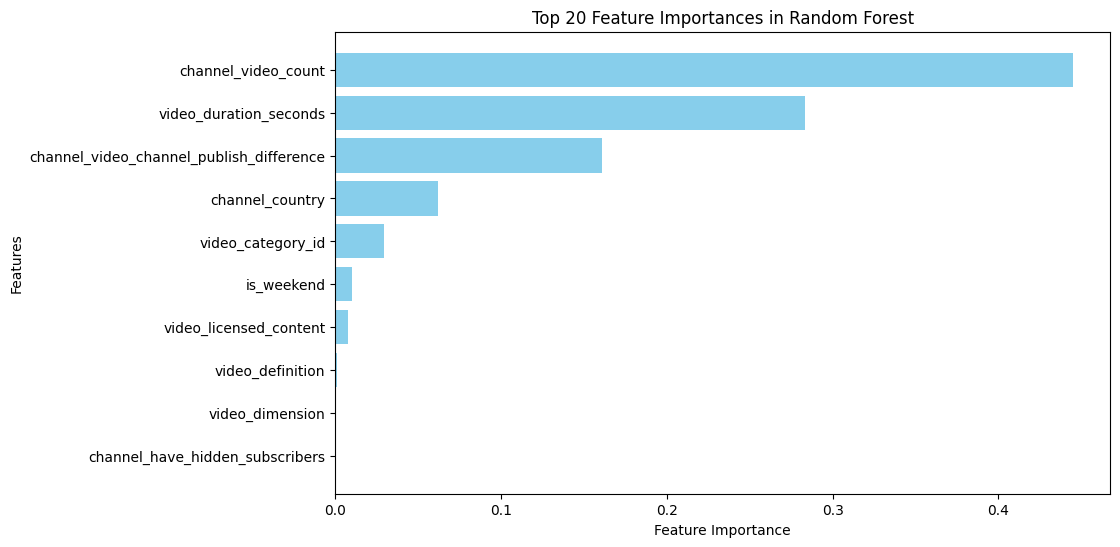

In [201]:
#feature_names = pd.concat([data[categorical_features],data[numerical_features],data[embedded_text_columns]]).columns
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  
plt.show()

In [202]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)

In [204]:
X_test_scaled[:100].shape

(100, 3)

In [207]:
X_sampled_test = X_train[:100]

possibly need to drop the country

In [208]:
shap_values = explainer.shap_values(X_sampled_test)

In [223]:
shap_values[1].shape

(10, 2)

In [217]:
print("SHAP values shape:", shap_values[1].shape)  # Replace 1 with the index for your binary/multiclass target
print("Features shape:", X_sampled_test.shape)


SHAP values shape: (10, 2)
Features shape: (100, 10)


In [213]:
index = 0  # Change the index to visualize a specific sample
shap.force_plot(
    explainer.expected_value[1],  # Expected value for class 1 (adjust if binary)
    shap_values[1][index],        # SHAP values for the selected prediction
    X_sampled_test[index],   # Input features for the selected prediction
    matplotlib=True              # Use matplotlib to plot
)

DimensionError: Length of features is not equal to the length of shap_values!